# Import dependencies

In [1]:
# Import management
from importlib import reload

# Data Manipulations and Preprocessing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Services
import services.ModelStageService as sds

# utils
import utils.EDAUtils as edaUtils
import utils.PlottingUtils as plotUtils

# Reload all custom dependencies
reload(sds)
reload(edaUtils)
reload(plotUtils)

sns.set_style('darkgrid')
sns.color_palette('pastel')

# Create model stage instance
stage_data_io_service = sds.ModelStageService(current_stage_name=sds.EDA_STAGE)

# Load data

In [2]:
df = stage_data_io_service.run_or_load_stage_data()

# EDA - exploratory data analyze

## Look on the top of dataset

In [3]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,None,US,02,...,NaN,9.37,NaN,NaN,NaN,True,NaN,NaN,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False


## Make simple data summary

In [4]:
edaUtils.data_summary(df)

Dimensions: 786363 rows, 29 columns
Total NA's: 4728625
There are no duplicates in this dataset!
Column Name                            Data Type  Count Distinct  NA Values 
accountNumber                          object     5000            0         
customerId                             object     5000            0         
creditLimit                            float64    10              0         
availableMoney                         float64    521916          0         
transactionDateTime                    object     776637          0         
transactionAmount                      float64    66038           0         
merchantName                           object     2490            0         
acqCountry                             object     4               4562      
merchantCountryCode                    object     4               724       
posEntryMode                           object     5               4054      
posConditionCode                       object     3     

## Dataset Column Descriptions:

1. **`accountNumber`**:  
   The account number related to the transaction.

2. **`customerId`**:  
   A unique identifier for the customer.

3. **`creditLimit`**:  
   The credit limit of the customer’s account, indicating the maximum amount they are allowed to spend.

4. **`availableMoney`**:  
   The available funds on the customer’s account at the time of the transaction. `availableMoney=creditLimit−currentBalance`

5. **`transactionDateTime`**:  
   The date and time when the transaction occurred.

6. **`transactionAmount`**:  
   The amount of money involved in the transaction.

7. **`merchantName`**:  
   The name of the merchant where the transaction took place.

8. **`acqCountry`**:  
   The country where the payment instrument (e.g., card) was issued.

9. **`merchantCountryCode`**:  
   The country code of the merchant’s location.

10. **`posEntryMode`**:  
    Describes how the card details were entered at the point of sale (e.g., chip, magnetic stripe, manual entry).

11. **`posConditionCode`**:  
    The condition at the point of sale during the transaction (e.g., whether the card was physically present or not) ???

12. **`merchantCategoryCode`**:  
    A code that represents the category of the merchant’s business (e.g., restaurant, clothing store).

13. **`currentExpDate`**:  
    The current expiration date of the card involved in the transaction.

14. **`accountOpenDate`**:  
    The date when the customer’s account was opened.

15. **`dateOfLastAddressChange`**:  
    The last time the customer changed their address.

16. **`cardCVV`**:  
    The CVV code associated with the card used for the transaction.

17. **`enteredCVV`**:  
    The CVV code entered by the customer during the transaction.

18. **`cardLast4Digits`**:  
    The last 4 digits of the card used in the transaction. Used to identify the specific card in use.

19. **`transactionType`**:  
    The type of transaction (e.g., PURCHASE, REVERSAL, ADDRESS_VERIFICATION).

20. **`echoBuffer`**:  
    A technical field that might contain auxiliary information related to the transaction.

21. **`currentBalance`**:  
    This is the customer's current credit card debt—the amount that needs to be repaid. It increases with each new transaction and decreases as the debt is paid off. `currentBalance=creditLimit−availableMoney`

22. **`merchantCity`**:  
    The city where the merchant is located.

23. **`merchantState`**:  
    The state where the merchant is located (applicable mostly to U.S. transactions).

24. **`merchantZip`**:  
    The postal code of the merchant's location.

25. **`cardPresent`**:  
    Indicates whether the physical card was present during the transaction (`True`/`False`).

26. **`posOnPremises`**:  
    Specifies whether the transaction occurred on the merchant’s premises or remotely (e.g., online).

27. **`recurringAuthInd`**:  
    Indicates whether the transaction is part of a recurring authorization (e.g., subscription).

28. **`expirationDateKeyInMatch`**:  
    Indicates if the entered expiration date matches the card’s actual expiration date (`True`/`False`).

29. **`isFraud`**:  
    A label indicating whether the transaction is fraudulent (`True`/`False`). This is the target variable for  anomaly detection model.


## Rename column current balance to credit debt. It is more appropriate name

In [5]:

df = df.rename(columns={"currentBalance": "creditDebt"})
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,creditDebt,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


## Analyze categorical features
The most null values in categorical features, so let`s analyze them

In [6]:
categorical_columns = ['transactionType', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'isFraud',
                       'posConditionCode', 'merchantCategoryCode', 'expirationDateKeyInMatch', 'cardPresent']
melted = df[categorical_columns].melt(var_name='column', value_name='value')
value_counts = melted.value_counts().reset_index(name='counts')
sorted_df = value_counts.sort_values(by=['column', 'counts'])

sorted_df

,column,value,counts
41,acqCountry,PR,1538
38,acqCountry,CAN,2424
36,acqCountry,MEX,3130
2,acqCountry,US,774709
7,cardPresent,True,352868
6,cardPresent,False,433495
43,expirationDateKeyInMatch,True,1043
0,expirationDateKeyInMatch,False,785320
30,isFraud,True,12417
3,isFraud,False,773946


### Visualize categorical features. Split on fraud and non-fraud df

In [7]:
fraudDf = df[df['isFraud'] == True]
nonFraudDf = df[df['isFraud'] == False]

### Show pie distribution for categorical features for general dataset

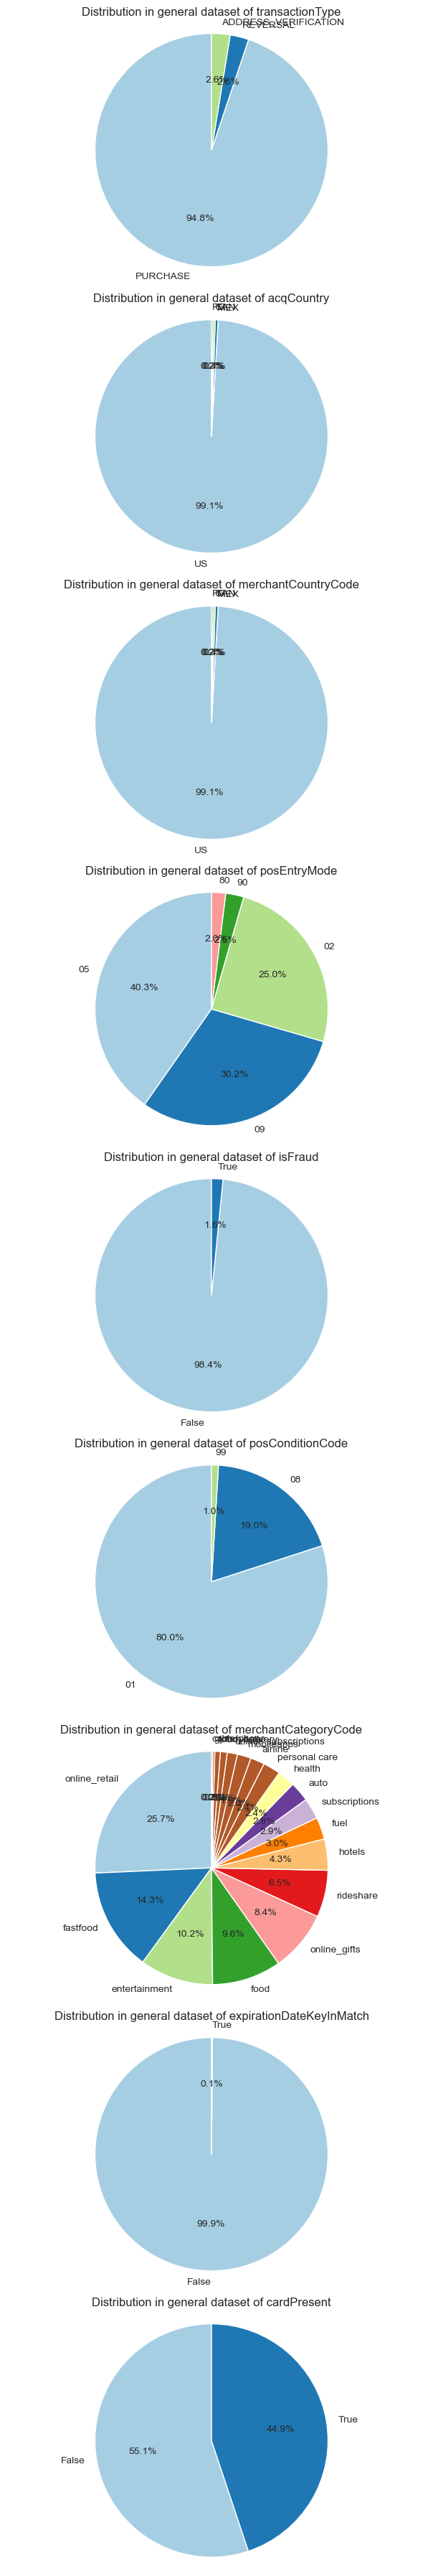

In [8]:
plotUtils.plot_pie_distribution(df, categorical_columns, title='Distribution in general dataset of')

### Show pie distribution for categorical features for fraud dataset

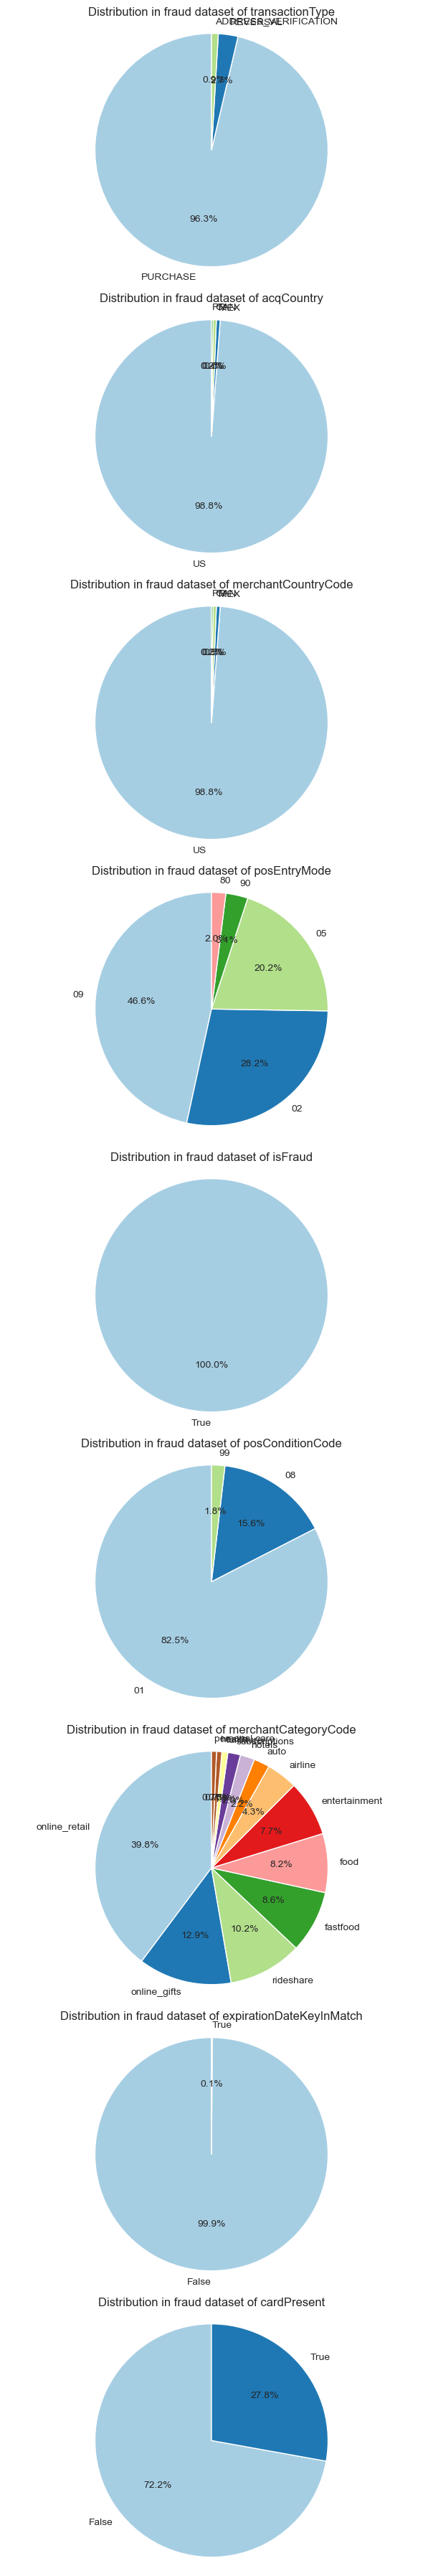

In [9]:
plotUtils.plot_pie_distribution(fraudDf, categorical_columns, title='Distribution in fraud dataset of')

### Show pie distribution for categorical features for non-fraud dataset

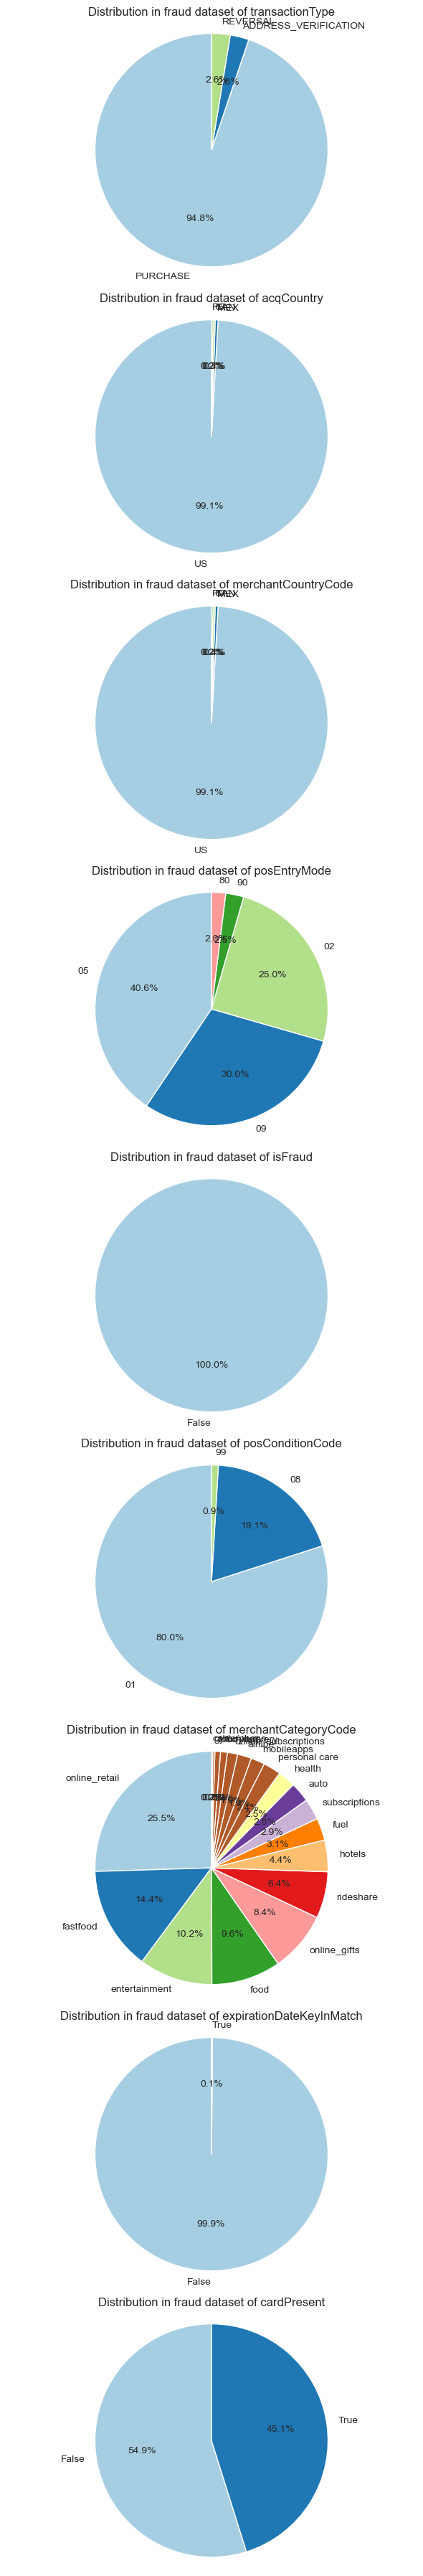

In [10]:
plotUtils.plot_pie_distribution(nonFraudDf, categorical_columns, title='Distribution in fraud dataset of')

## Analyze discrete features
Define discrete columns and describe them

In [11]:
discrete_columns = ["creditLimit", "availableMoney", "transactionAmount", "creditDebt"]
df.describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,creditDebt,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,10759.464459,6250.725369,136.985791,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,11636.174890,8880.783989,147.725569,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.000000,1077.420000,33.650000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,7500.000000,3184.860000,87.900000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,7500.000000,191.480000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,50000.000000,2011.540000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


### Visualizing discrete columns statistics using hists to see distribution

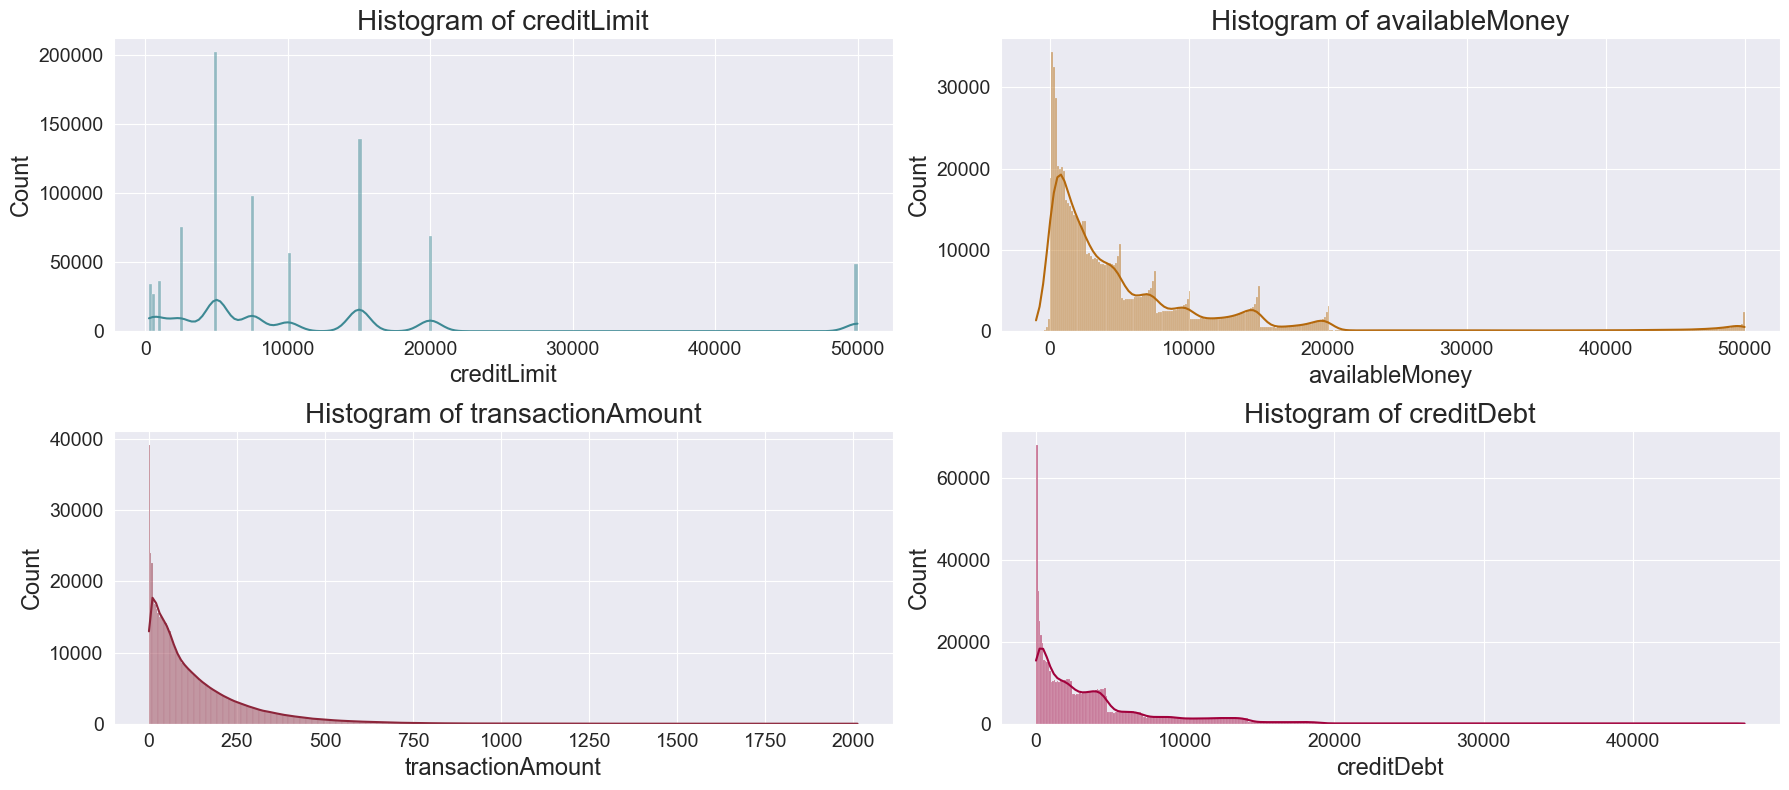

In [12]:
plotUtils.plot_hist_distribution(df, discrete_columns)

### Visualizing discrete columns statistics using Box-plot to see deviation

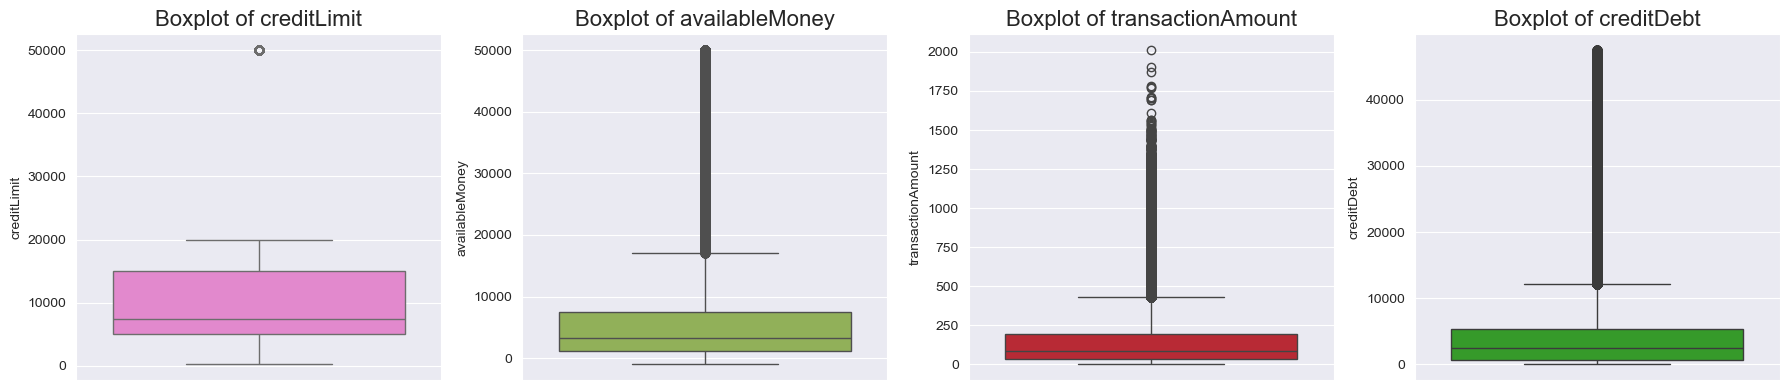

In [13]:
plotUtils.plot_boxplots_distribution(df, discrete_columns)

### Check discrete columns correlation

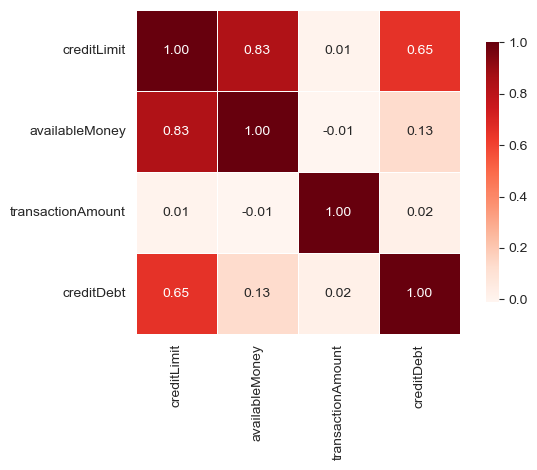

In [14]:
plotUtils.plot_correlation_heatmap(df, discrete_columns, cmap="Reds")

### Check records where `availableMoney` column has negative values

In [15]:
df[df['availableMoney'] < 0].describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,creditDebt,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,2931.000000,2931.000000,2931.000000,0.0,2931.000000,0.0,0.0,0.0,0.0,0.0
mean,478.164449,-133.507492,139.458987,NaN,611.671941,NaN,NaN,NaN,NaN,NaN
std,605.711587,138.852842,151.290834,NaN,624.484228,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,250.010000,NaN,NaN,NaN,NaN,NaN
25%,250.000000,-177.815000,35.280000,NaN,311.335000,NaN,NaN,NaN,NaN,NaN
50%,250.000000,-92.220000,90.540000,NaN,431.070000,NaN,NaN,NaN,NaN,NaN
75%,500.000000,-39.770000,195.240000,NaN,634.035000,NaN,NaN,NaN,NaN,NaN
max,7500.000000,-0.010000,1338.250000,NaN,7634.540000,NaN,NaN,NaN,NaN,NaN


### Check transaction with amount 0 grouping by type

In [16]:
df[df['transactionAmount'] == 0].transactionType.value_counts().sort_values(ascending=False)

transactionType
ADDRESS_VERIFICATION    20169
PURCHASE                 1484
REVERSAL                  572
Name: count, dtype: int64

### Check count of frauds by transaction type where amount equals 0

In [17]:
zero_amount_fraud = df[(df['transactionAmount'] == 0) & (df['isFraud'] == True)]

fraud_count_per_transaction_type = zero_amount_fraud.groupby('transactionType').size()

fraud_count_per_transaction_type

transactionType
ADDRESS_VERIFICATION    116
REVERSAL                  6
dtype: int64

In [18]:
zero_amount_fraud

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,creditDebt,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
2031,863358589,863358589,2500.0,498.33,2016-09-27T13:31:51,0.0,West End Beauty #469474,US,US,05,...,NaN,2001.67,NaN,NaN,NaN,False,NaN,NaN,False,True
2108,863358589,863358589,2500.0,1056.83,2016-11-24T21:37:19,0.0,West End Beauty #72256,US,US,05,...,NaN,1443.17,NaN,NaN,NaN,False,NaN,NaN,False,True
8650,934061435,934061435,5000.0,4054.43,2016-01-04T13:16:48,0.0,Dunkin' Donuts #48174,US,US,02,...,NaN,945.57,NaN,NaN,NaN,False,NaN,NaN,False,True
8674,934061435,934061435,5000.0,367.22,2016-01-17T19:11:14,0.0,Dunkin' Donuts #48174,US,US,02,...,NaN,4632.78,NaN,NaN,NaN,False,NaN,NaN,False,True
19731,128258324,128258324,2500.0,2417.38,2016-04-03T05:43:45,0.0,Boston Fries,US,US,05,...,NaN,82.62,NaN,NaN,NaN,False,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723934,406723870,406723870,7500.0,1376.96,2016-09-04T05:52:39,0.0,Downtown BBQ,US,US,05,...,NaN,6123.04,NaN,NaN,NaN,False,NaN,NaN,False,True
735283,435257379,435257379,10000.0,7498.38,2016-06-14T21:08:25,0.0,Pizza Hut #330707,US,US,None,...,NaN,2501.62,NaN,NaN,NaN,False,NaN,NaN,False,True
740465,841345961,841345961,20000.0,13744.24,2016-12-09T06:48:56,0.0,walmart.com,US,US,09,...,NaN,6255.76,NaN,NaN,NaN,False,NaN,NaN,False,True
775537,685866922,685866922,5000.0,1939.33,2016-02-20T17:06:52,0.0,Franks Cafe,US,US,05,...,NaN,3060.67,NaN,NaN,NaN,False,NaN,NaN,False,True


### Check if `ADDRESS_VERIFICATION` typed transactions has only zero transaction amount

In [19]:
print(len(df[(df['transactionType'] == 'ADDRESS_VERIFICATION') & (df['transactionAmount'] != 0)]) == 0)

True


### Credit debt feature analyze
>Analysis of the case when the credit debt first grows and then instantly drops to 0. Based on this 
>analysis and graph, we can conclude that the dataset does not provide a record of the intermediate
>transaction of repaying the credit debt. This graph shows the balanced repayment of credit debt by the
>base client who has no cases of fraud

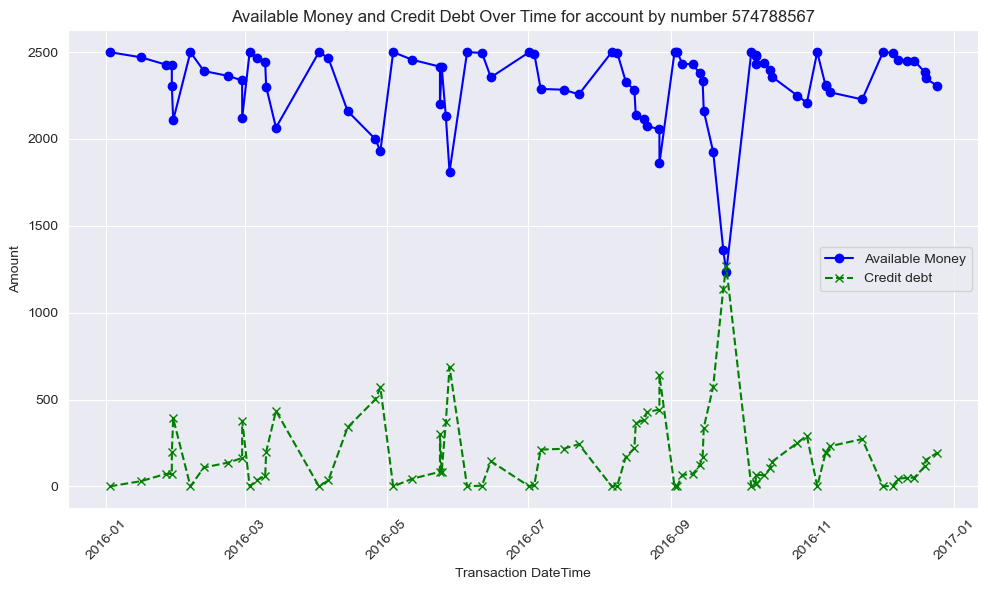

In [20]:
accountNumber = '574788567'
specific_account_df = df[df['accountNumber'] == accountNumber]
specific_account_df.sort_values('transactionDateTime')


def plot_available_money_and_credit_debt(df, customer_id):
    """
    Plots the available money and credit debt over time for a specific customer.

    Args:
    - df (DataFrame): DataFrame containing the data.
    - transaction_date_column (str): The column name for transaction date.
    - available_money_column (str): The column name for available money.
    - credit_debt_column (str): The column name for credit debt.
    - customer_id (int/str): ID of the specific customer.
    """
    plt.figure(figsize=(10, 6))

    plt.plot(pd.to_datetime(df['transactionDateTime']), df['availableMoney'], marker='o', linestyle='-', color='b',
             label='Available Money')
    plt.plot(pd.to_datetime(df['transactionDateTime']), df['creditDebt'], marker='x', linestyle='--', color='g',
             label='Credit debt')

    plt.title(f'Available Money and Credit Debt Over Time for account by number {customer_id}')
    plt.xlabel('Transaction DateTime')
    plt.ylabel('Amount')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()


plot_available_money_and_credit_debt(specific_account_df, accountNumber)

In [21]:
df.creditLimit.describe()

count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

### Graphs visualize the number of fraud cases at different credit limit ranges

C:\Users\gorba\AppData\Local\Temp\ipykernel_14916\1684910579.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df[df['isFraud'] == True].groupby('creditLimitRange').size()
C:\Users\gorba\AppData\Local\Temp\ipykernel_14916\1684910579.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('creditLimitRange').size()


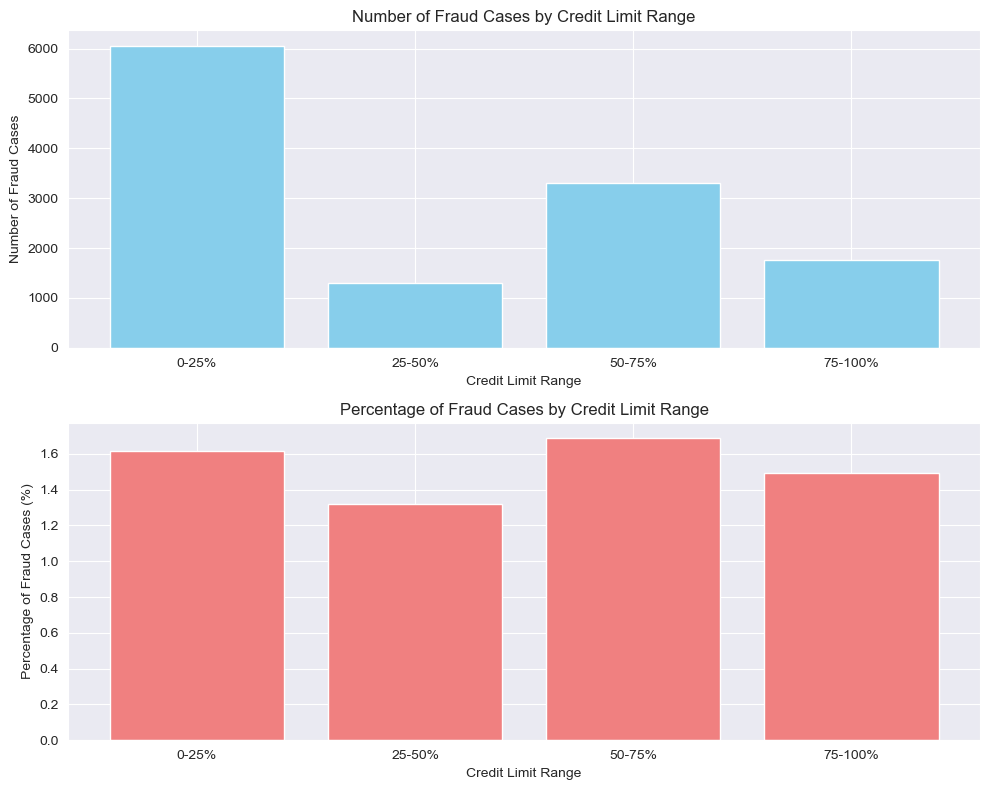

In [22]:
q1 = df['creditLimit'].quantile(0.25)
q2 = df['creditLimit'].quantile(0.50)
q3 = df['creditLimit'].quantile(0.75)

# Add new column with credit limit range 
df['creditLimitRange'] = pd.cut(df['creditLimit'], bins=[-float('inf'), q1, q2, q3, float('inf')],
                                labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# Calculate fraud records count by each range
fraud_counts = df[df['isFraud'] == True].groupby('creditLimitRange').size()

# Calculate general records count by each range
total_counts = df.groupby('creditLimitRange').size()

# Calculate percentage
fraud_percentage = (fraud_counts / total_counts) * 100

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Count graph of fraud cases
ax[0].bar(fraud_counts.index, fraud_counts.values, color='skyblue')
ax[0].set_title('Number of Fraud Cases by Credit Limit Range')
ax[0].set_xlabel('Credit Limit Range')
ax[0].set_ylabel('Number of Fraud Cases')

# Percentage graph of fraud cases
ax[1].bar(fraud_percentage.index, fraud_percentage.values, color='lightcoral')
ax[1].set_title('Percentage of Fraud Cases by Credit Limit Range')
ax[1].set_xlabel('Credit Limit Range')
ax[1].set_ylabel('Percentage of Fraud Cases (%)')

plt.tight_layout()
plt.show()


## Analyze datetime columns
### Check if dataset contains transactions with expired card

In [23]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], format='%Y-%m-%dT%H:%M:%S')
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%m/%Y', errors='coerce')

df_filtered = df[
    (df['transactionDateTime'].dt.year > df['currentExpDate'].dt.year) |
    ((df['transactionDateTime'].dt.year == df['currentExpDate'].dt.year) &
     (df['transactionDateTime'].dt.month > df['currentExpDate'].dt.month))
    ]
print(f'Dataset contains transactions with expired card - {len(df_filtered) > 0}')


Dataset contains transactions with expired card - False


Number of accounts with address changes greater than 0: 5000
Fraud rate among accounts with address changes greater than 0: 1.58%
Number of accounts with address changes greater than 3: 200
Fraud rate among accounts with address changes greater than 3: 1.74%


Number of accounts with address changes greater than 5: 75
Fraud rate among accounts with address changes greater than 5: 1.79%
Number of accounts with address changes greater than 7: 37
Fraud rate among accounts with address changes greater than 7: 1.75%


Number of accounts with address changes greater than 10: 24
Fraud rate among accounts with address changes greater than 10: 1.77%
Number of accounts with address changes greater than 15: 11
Fraud rate among accounts with address changes greater than 15: 1.80%


Number of accounts with address changes greater than 20: 6
Fraud rate among accounts with address changes greater than 20: 1.74%
Number of accounts with address changes greater than 30: 3
Fraud rate among accounts with address changes greater than 30: 1.65%


Number of accounts with address changes greater than 40: 2
Fraud rate among accounts with address changes greater than 40: 1.91%
Number of accounts with address changes greater than 50: 1
Fraud rate among accounts with address changes greater than 50: 2.38%


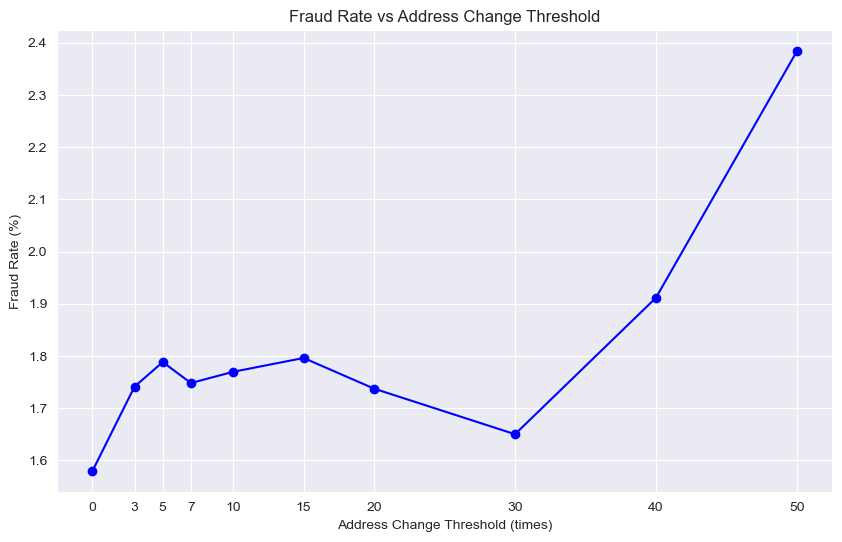

In [24]:
def analyze_fraud_by_address_change(df, threshold):
    """
    Analyze fraud rate based on the frequency of address changes.

    Parameters:
    df (pd.DataFrame): The dataset containing transactions.
    threshold (int): The minimum number of address changes to consider.

    Prints:
    - Number of accounts with frequent address changes.
    - Fraud rate among these accounts.
    """

    # Convert columns with dates to datetime format
    df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
    df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

    # Group by accountNumber and count the number of unique address changes
    address_change_counts = df.groupby('accountNumber')['dateOfLastAddressChange'].nunique()

    # Filter accounts with address changes greater than the threshold
    frequent_address_changers = address_change_counts[address_change_counts > threshold].index

    # Filter transactions for accounts with frequent address changes
    frequent_change_transactions = df[df['accountNumber'].isin(frequent_address_changers)]

    # Calculate fraud rate among these accounts
    fraud_rate = frequent_change_transactions['isFraud'].mean()

    # Print the results
    print(f"Number of accounts with address changes greater than {threshold}: {len(frequent_address_changers)}")
    print(f"Fraud rate among accounts with address changes greater than {threshold}: {fraud_rate * 100:.2f}%")

    return fraud_rate * 100


def visualize_fraud_vs_address_changes(df, thresholds):
    """
    Visualize the fraud rate for different thresholds of address changes.
    
    Parameters:
    df (pd.DataFrame): The dataset containing transactions.
    thresholds (list of int): List of address change thresholds to evaluate.
    """

    fraud_rates = []

    for threshold in thresholds:
        fraud_rate = analyze_fraud_by_address_change(df, threshold)
        fraud_rates.append(fraud_rate)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, fraud_rates, marker='o', linestyle='-', color='b')
    plt.title('Fraud Rate vs Address Change Threshold')
    plt.xlabel('Address Change Threshold (times)')
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(thresholds)
    plt.grid(True)
    plt.show()


thresholds = [0, 3, 5, 7, 10, 15, 20, 30, 40, 50]
visualize_fraud_vs_address_changes(df, thresholds)

## Save stage data

In [25]:
stage_data_io_service.write_stage_data(df)